In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
data = np.genfromtxt('../l2_data.txt', delimiter=',', dtype=np.float128)

In [167]:
def split_data(data):
    examples, features = data.shape
    x = data[:, :features - 1]
    y = data[:, features - 1]
    y = y.reshape(-1, 1)
    return x, y
x, y = split_data(data)

In [168]:
def normalize(dataset):
    return (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))
x = normalize(x)

In [169]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def h(theta, x):
    return sigmoid(np.dot(theta, x.T))

def train(x, y, learn_rate=0.01, reg_rate=2, iters=500):
    examples, features = x.shape
    theta = np.zeros((1, features+1))
    x_bias = np.column_stack((np.ones(examples), x))
    costs = []
    for i in range(iters):
        first = -np.dot(y.T, np.log(h(theta, x_bias)).T)
        second = np.dot((1-y).T, np.log(1 - h(theta, x_bias)).T)
        reg = (reg_rate / (2*examples)) * np.sum(theta[1:] ** 2)
        cost = np.sum(first - second) / examples + reg
        costs = [*costs, cost]
        grad = np.sum((h(theta, x_bias) - y.T)*x_bias.T, axis=1)
        grad_reg = (reg_rate/examples) * theta
        grad_reg[0] = 0
        theta -= learn_rate*(grad+grad_reg)
    return theta, costs


theta, costs = train(x, y) 

In [170]:
def predict(x, theta):
    examples, features = x.shape
    x_bias = np.column_stack((np.ones(examples), x))
    y_pred = h(theta, x_bias)
    return y_pred

def accuracy(x, theta, y, confidence=0.5):
    y_pred = predict(x, theta)
    err = np.sum((((y_pred > confidence).astype(int) - y.T) ** 2))
    return (len(y) - err) / len(y)

a = accuracy(x, theta, y)

In [171]:
def get_bound(theta):
    pts = []
    for i in np.arange(0.0, 1.0, 0.005):
        for j in np.arange(0.0, 1.0, 0.005):
            a = h(theta, np.array([1, i, j]))
            if 0.49 < a < 0.51:
                pts = [*pts, (i, j)]
    points = np.array(pts)
    if len(points) == 0:
        return np.array([[1], [1]])
    return points[0:, 0], points[0:, 1]


def plot_data(data, predicted, costs, bound):
    x, y = data
    xb, yb = bound
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    g1.plot(x[np.where(y == 1)][:, 0], x[np.where(y == 1)][:, 1], 'o', markersize=3)
    g1.plot(x[np.where(y == 0)][:, 0], x[np.where(y == 0)][:, 1], 'x', markersize=3)
    g1.plot(xb, yb, 'o', markersize=1)

    g1.axis([x.min() - x.mean(), x.max() + x.mean(), x.min() - x.mean(), x.max() + x.mean()])

    g2.plot(costs)
    plt.show()

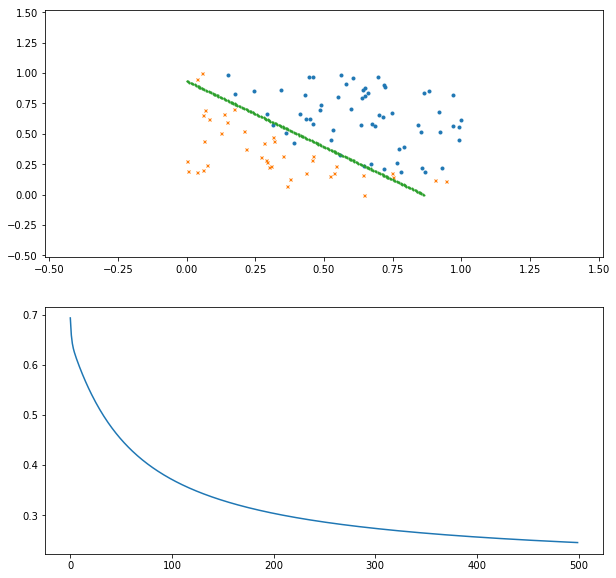

In [172]:
%matplotlib inline
bound = get_bound(theta)
y = y.T.reshape(-1)
plot_data((x, y), predict(x,theta), costs, bound)

In [173]:
data_sq = np.genfromtxt("../l2_data_2.txt", delimiter=",", dtype=np.float128)

In [174]:
def enrich_features(x, power=4):
    examples, features = x.shape
    for p in range(2, power + 1):
        for f in range(features):
            x = np.append(x, np.power(x[0:, f], p).reshape(examples, 1), axis=1)
    return x

In [175]:
x, y = split_data(data_sq)

In [176]:
x = normalize(x)
x = enrich_features(x)
theta, costs = train(x, y)
accuracy(x, theta, y)

0.73728813559322033897